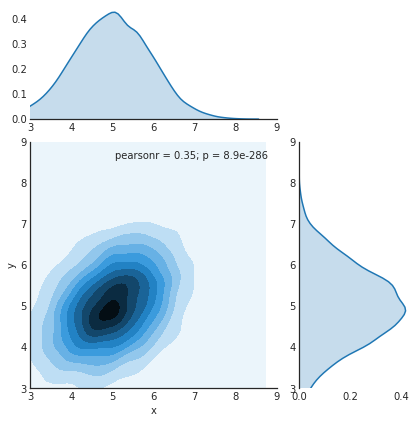

In [14]:
##### Gibbs MCMC Sampling
# requires results from lecture of the conditional pdfs
## ********* V2.0 with comments ***********
# Jay Jacob Jason Bla Nagler (2020, AC)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Conditional pdf p(x|y) of a multivariate normal distribution
def p_x_given_y(y, mus, sigmas):
    mu = mus[0] + sigmas[1, 0] / sigmas[1, 1] * (y - mus[1])
    sigma = sigmas[0, 0] - sigmas[1, 0] / sigmas[1, 1] * sigmas[1, 0]
    return np.random.normal(mu, sigma)

# Conditional pdf p(y|x) of a multivariate normal distribution
def p_y_given_x(x, mus, sigmas):
    mu = mus[1] + sigmas[0, 1] / sigmas[0, 0] * (x - mus[0])
    sigma = sigmas[1, 1] - sigmas[0, 1] / sigmas[0, 0] * sigmas[0, 1]
    return np.random.normal(mu, sigma)


def gibbs_sampling(mus, sigmas, iter=10000):
    samples = np.zeros((iter, 2))
    y = np.random.rand() * 10

    for i in range(iter):
        x = p_x_given_y(y, mus, sigmas)
        y = p_y_given_x(x, mus, sigmas)
        samples[i, :] = [x, y]

    return samples

mus = np.array([5, 5])
sigmas = np.array([[1, 0.35], [0.35, 1]])

samples = gibbs_sampling(mus, sigmas)
data = pd.DataFrame(samples, columns=['x', 'y'])

with sns.axes_style('white'):
    g= sns.jointplot("x", "y", data, kind='kde', xlim=(3, 9), ylim=(3,9), ratio=2);

You see that generated from indepedent normal distrubutions, we generate correlated samples by 
sampling monte carlo numbers from the marginals. Here the parameters mus and sigmas are given
and we want to sample from the joint distribution that is nowhere defined here.
The Pearson correlation matches magically (see derivation) the one implicitely given through the covariance matrix.
This is truly amazing.